In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt

## Métodos iterativos para la solución de sistemas lineales

Partimos de la ecuación $Ax = b$, pero vamos a hacer una pequeña modificación: 

$$Ax - b = 0$$

Esta condición se cumple si, y solo si el vector $x$ que tiene esa ecuación es una solución exacta al sistema de ecuaciones lineales. Ahora, si yo reemplazo el $x$ por un $\bar{x}$ que es una solución aproximada, obtendré que: 

$$A\bar{x} - b = r$$

Donde $r$ es un residuo, cuya norma puede definirse como el error de la aproximación que se está teniendo al sistema lineal de ecuaciones. 

Para el ejemplo de programación, trabajaremos con un [ejemplo de Julioprofe](https://www.youtube.com/watch?v=fMLyA0zscjY) de youtube que tiene una solución conocida y a la que es fácil llegar. 

In [15]:
A = np.array([[2, 1, -3],
              [5, -4, 1],
              [1, -1, -4]], dtype='float64')

b = np.array([7, -19, 4.])
np.linalg.solve(A, b)

array([-1.,  3., -2.])

## Método de Jacobi: 

En el método de Jacobi (explicarlo un poco)

In [16]:
# Proponer una solución inicial y almacenarla en un vector x0
x0 = np.ones(len(A))
x1 = np.empty_like(x0)

# Parámetros de la solución
err = 1e10
tol = 1e-6
count = 0

while err >= tol:
    
    # Cuenta
    count += 1
    
    # Calculo cada uno de los elementos de x1, usando los valores de x0
    for i in range(0, len(A)):
        
        # Fórmula para calcular cada uno de los espacios del vector solución
        x1[i] = (b[i] - np.dot(A[i, 0:i], x0[0:i]) -
                 np.dot(A[i, i + 1 :], x0[i + 1:])) / A[i, i]
        
    # Cálculo del error
    err = np.linalg.norm(np.dot(A, x1) - b)
    
    # Imprmiendo el vector solución y el error asociado
    print(count, x1, err)
    
    # Reemplazando los valores
    x0 = x1

1 [ 4.5   6.25 -1.  ] 19.2321345669169
2 [-1.125      3.09375   -2.0546875] 1.05471643478828
3 [-1.12890625  2.82519531 -1.98852539] 0.4717040756586495
4 [-0.89538574  3.13363647 -2.00725555] 0.36511239539973983
5 [-1.07770157  2.90105915 -1.99469018] 0.27056537991083
6 [-0.94256485  3.0731214  -2.00392156] 0.19996958338984755
7 [-1.04244304  2.94596581 -1.99710221] 0.14777106924539965
8 [-0.96863622  3.03992917 -2.00214135] 0.10919709836786883
9 [-1.02317661  2.97049391 -1.99841763] 0.08069238718598079
10 [-0.98287339  3.02180385 -2.00116931] 0.0596285181650516
11 [-1.01265589  2.98388781 -1.99913592] 0.044063142716884454
12 [-0.99064779  3.01190628 -2.00063852] 0.03256093905490832
13 [-1.00691092  2.99120172 -1.99952816] 0.0240612604267441
14 [-0.9948931   3.00650158 -2.00034867] 0.017780330362927525
15 [-1.0037738   2.99519559 -1.99974235] 0.013138968707701166
16 [-0.99721131  3.00355027 -2.0001904 ] 0.009709183979049416
17 [-1.00206073  2.99737649 -1.9998593 ] 0.007174707211517898


## Método de Gauss-Seidel

Lo mismo que Jacobi pero uso los valores nuevos que voy encontrando. 

In [17]:
# Proponer una solución inicial y almacenarla en un vector x0
x0 = np.ones(len(A))
x1 = np.empty_like(x0)

# Parámetros de la solución
err = 1e10
tol = 1e-6
count = 0

while err >= tol:
    
    # Cuenta
    count += 1
    
    # Calculo cada uno de los elementos de x1, usando los valores de x0
    for i in range(0, len(A)):
        
        # Fórmula para calcular cada uno de los espacios del vector solución
        x1[i] = (b[i] - np.dot(A[i, 0:i], x1[0:i]) -
                 np.dot(A[i, i + 1 :], x0[i + 1:])) / A[i, i]
        
    # Cálculo del error
    err = np.linalg.norm(np.dot(A, x1) - b)
    
    # Imprmiendo el vector solución y el error asociado
    print(count, x1, err)
    
    # Reemplazando los valores
    x0 = x1

1 [ 4.5     10.625   -2.53125] 20.52480397287633
2 [-5.609375   -2.89453125 -1.67871094] 16.09973679084528
3 [ 2.42919922  7.36682129 -2.23440552] 11.941372975314609
4 [-3.53501892 -0.22737503 -1.82691097] 8.826091843210161
5 [ 0.87332106  5.38492358 -2.12790063] 6.522216373499676
6 [-2.38431273  1.23763392 -1.90548666] 4.819666171760351
7 [ 0.02295304  4.30231963 -2.06984165] 3.561544935016064
8 [-1.75592229  2.03763673 -1.94838975] 2.6318424126137896
9 [-0.44140299  3.71114882 -2.03813795] 1.944828605635271
10 [-1.41278134  2.47448884 -1.97181754] 1.4371522727583745
11 [-0.69497073  3.3883322  -2.02082573] 1.0619993191663792
12 [-1.2254047  2.7130377 -1.9846106] 0.7847759595750339
13 [-0.83343475  3.21205392 -2.01137217] 0.579918739694045
14 [-1.12308521  2.84330045 -1.99159641] 0.42853726664925385
15 [-0.90904485  3.11579484 -2.00620992] 0.3166722789542903
16 [-1.0672123   2.91443214 -1.99541111] 0.2340084283502496
17 [-0.95033274  3.0632313  -2.00339101] 0.17292307593131181
18 [-1.

## Método SOR:

Combino los vectores x0 y x1 en un promedio ponderado para poder hallar la solución más rápido o más lento (dependiendo del alpha que se seleccione)

In [18]:
# Proponer una solución inicial y almacenarla en un vector x0
x0 = np.ones(len(A))
x1 = np.empty_like(x0)

# Parámetros de la solución
err = 1e10
tol = 1e-6
alpha = 0.24
count = 0

while err >= tol:
    
    # Cuenta
    count += 1
    
    # Calculo cada uno de los elementos de x1, usando los valores de x0
    for i in range(0, len(A)):
        
        # Fórmula para calcular cada uno de los espacios del vector solución
        x1[i] = (b[i] - np.dot(A[i, 0:i], x1[0:i]) - np.dot(A[i, i + 1 :], x0[i + 1:])) / A[i, i]
        
    # Cálculo de solución parcial
    sol = alpha * x0  + (1 - alpha) * x1
        
    # Cálculo del error
    err = np.linalg.norm(np.dot(A, sol) - b)
    
    # Imprmiendo el vector solución y el error asociado
    print(count, sol, err)
    
    # Reemplazando los valores
    x0 = sol

1 [ 3.66     8.315   -1.68375] 14.019691620181952
2 [-1.540775    2.26171875 -1.83542344] 2.395026779674176
3 [-0.66162184  3.43928724 -1.99757927] 1.1160534311891053
4 [-1.08295876  2.90067697 -1.98927341] 0.2986791336752052
5 [-0.96993905  3.04066435 -2.00105832] 0.10501603444725055
6 [-1.00944431  2.98873469 -1.99916254] 0.032728806390244364
7 [-0.99703112  3.00399984 -2.00016601] 0.010525307940071815
8 [-1.00099666  2.99879193 -1.99992513] 0.0034279645629532005
9 [-0.99969478  3.00040481 -2.00001961] 0.0010801920283871262
10 [-1.00010293  2.99987319 -1.99999276] 0.00035441949176558764
11 [-0.99996827  3.00004149 -2.00000213] 0.00011175503263215924
12 [-1.00001058  2.9999868  -1.99999927] 3.654583669328371e-05
13 [-0.9999967   3.00000427 -2.00000023] 1.1584652273707092e-05
14 [-1.00000109  2.99999863 -1.99999993] 3.769268654136156e-06
15 [-0.99999966  3.00000044 -2.00000002] 1.2007731142430295e-06
16 [-1.00000011  2.99999986 -1.99999999] 3.8906569701657044e-07


In [19]:
def SOR(A, b, alpha):
    
    # Proponer una solución inicial y almacenarla en un vector x0
    x0 = np.ones(len(A))
    x1 = np.empty_like(x0)
    # Parámetros de la solución
    err = 1e10
    tol = 1e-6
    # alpha = 0.24
    count = 0

    while err >= tol:

        # Cuenta
        count += 1

        # Calculo cada uno de los elementos de x1, usando los valores de x0
        for i in range(0, len(A)):

            # Fórmula para calcular cada uno de los espacios del vector solución
            x1[i] = (b[i] - np.dot(A[i, 0:i], x1[0:i]) - np.dot(A[i, i + 1 :], x0[i + 1:])) / A[i, i]

        # Cálculo de solución parcial
        sol = alpha * x0  + (1 - alpha) * x1

        # Cálculo del error
        err = np.linalg.norm(np.dot(A, sol) - b)

        # Imprmiendo el vector solución y el error asociado
        # print(count, sol, err)

        # Reemplazando los valores
        x0 = sol
        
    return [sol, count]

In [20]:
# Verificando el comportamiento del método SOR en el problema
ALPHA = np.linspace(0, 0.99, 1000)
cuentas = np.empty_like(ALPHA)

for i in range(0, len(ALPHA)):
    
    cuentas[i] = SOR(A, b, ALPHA[i])[1]

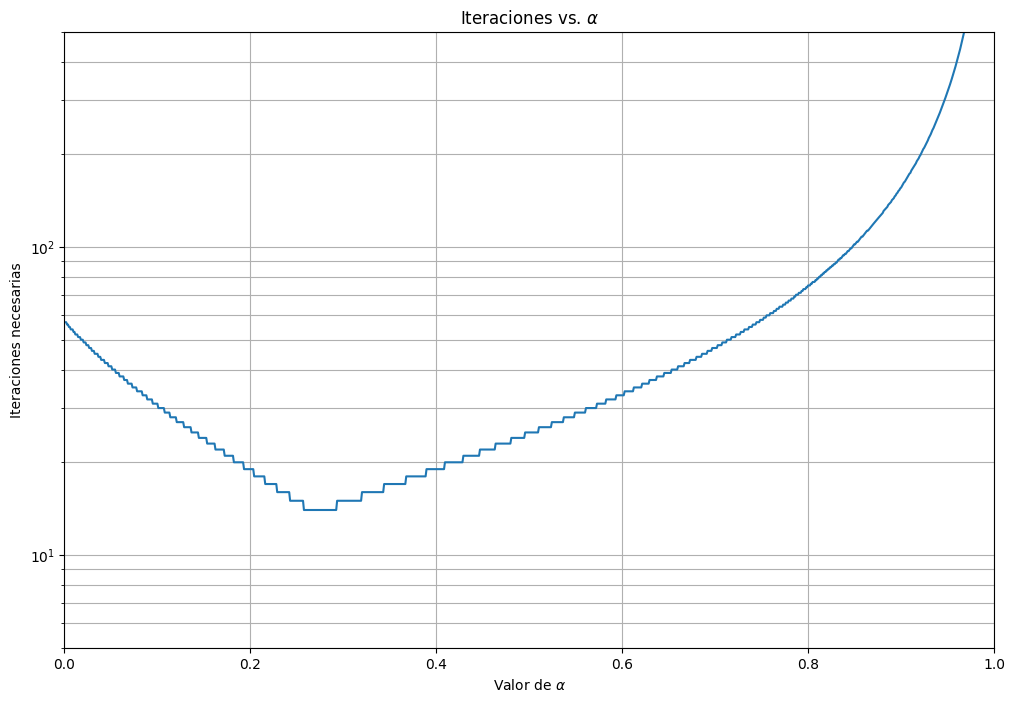

In [23]:
# Graficando para ver cosas interesantes
plt.figure(figsize=(12, 8))    
plt.semilogy(ALPHA, cuentas)
plt.ylabel('Iteraciones necesarias')
plt.xlabel(r'Valor de $\alpha$')
plt.ylim([5, 5e2])
plt.xlim([0, 1])
plt.grid()
plt.title(r'Iteraciones vs. $\alpha$')
plt.grid(which='minor')
plt.show()